In [1]:
import torch
from dataloader import dataset_train, dataset_val, dataloader_train, dataloader_val
from utilities import show_image, heatmaps2keypoints
from model.ContextUnet import ContextUnet
from model.ddpm import DDPM
from loss import JointsMSELoss

import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


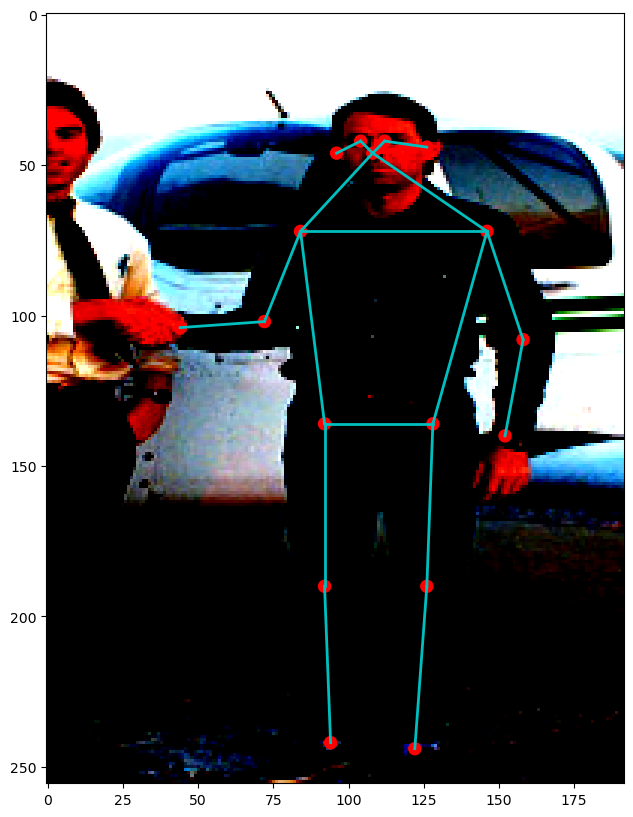

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


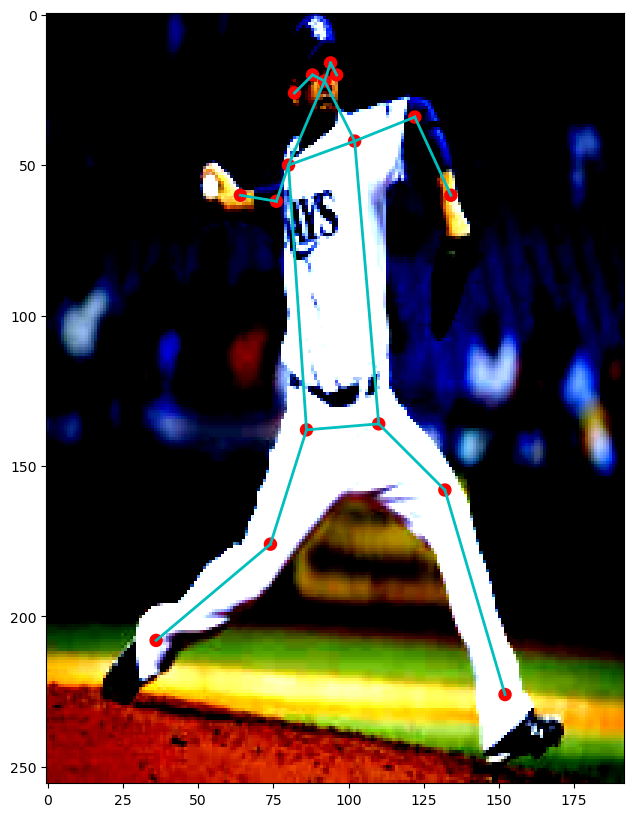

In [2]:
sampla_index_train = torch.randint(0, len(dataset_train), (1,)).item()
sampla_index_val = torch.randint(0, len(dataset_val), (1,)).item()
dataset_train.show_sample(sampla_index_train)
dataset_val.show_sample(sampla_index_val)

In [3]:
model_path = "./checkpoint/heatmap_diffusion_v2.pth"
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device.")
diffusion_model = DDPM(
    eps_model=ContextUnet(
        n_channel=17, n_feat=256, n_cfeat=1000),
    betas=(1e-4, 0.02),
    num_timesteps=1000,
    criterion=JointsMSELoss())
diffusion_model.load_state_dict(torch.load(model_path)["model_state_dict"])
trained_epoch = torch.load(model_path)["epoch"]
lr = torch.load(model_path)["lr"]
diffusion_model.to(device)
diffusion_model.eval()
print(f"Model loaded. Trained epoch: {trained_epoch}")

Using cuda device.
Model loaded. Trained epoch: 92


In [4]:
val_image, _, visiblity = dataset_val[sampla_index_val]

In [5]:
with torch.no_grad():
    generated_heatmaps = diffusion_model.sample(
        n_sample=4, size=(17, 128, 96), c=val_image, device=device)
    generated_heatmaps = generated_heatmaps.cpu()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


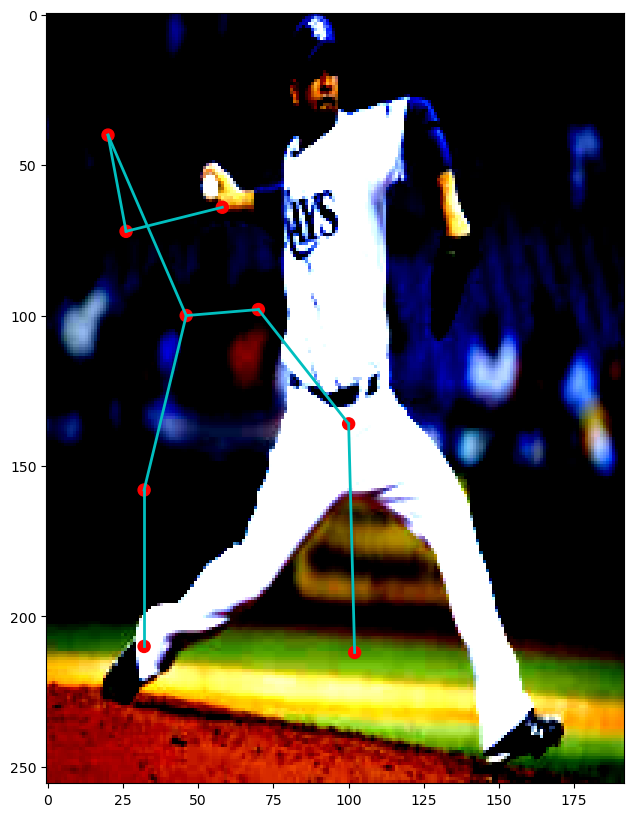

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


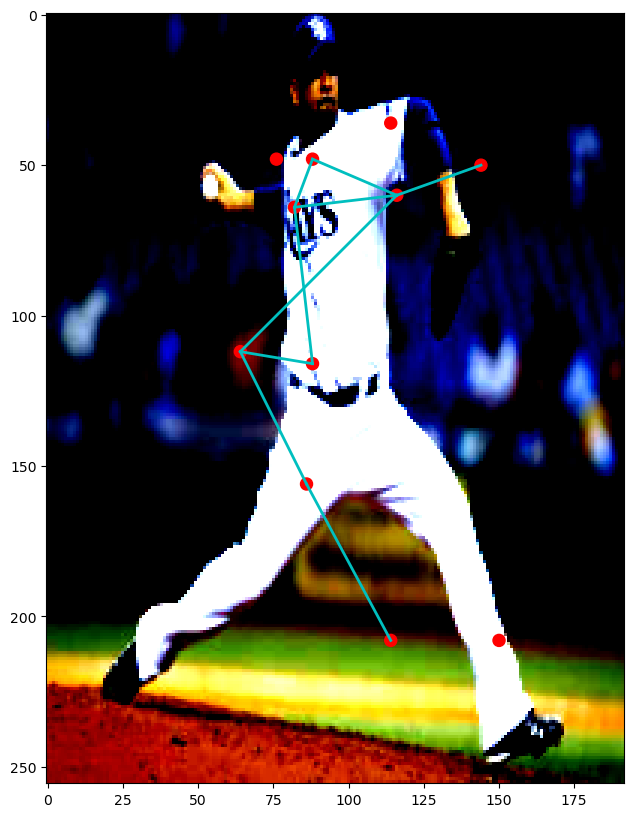

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


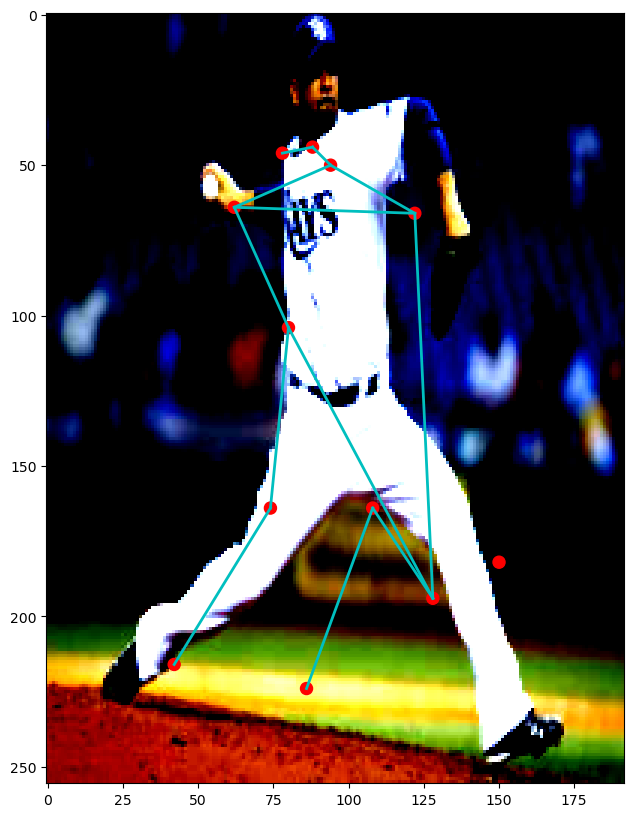

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


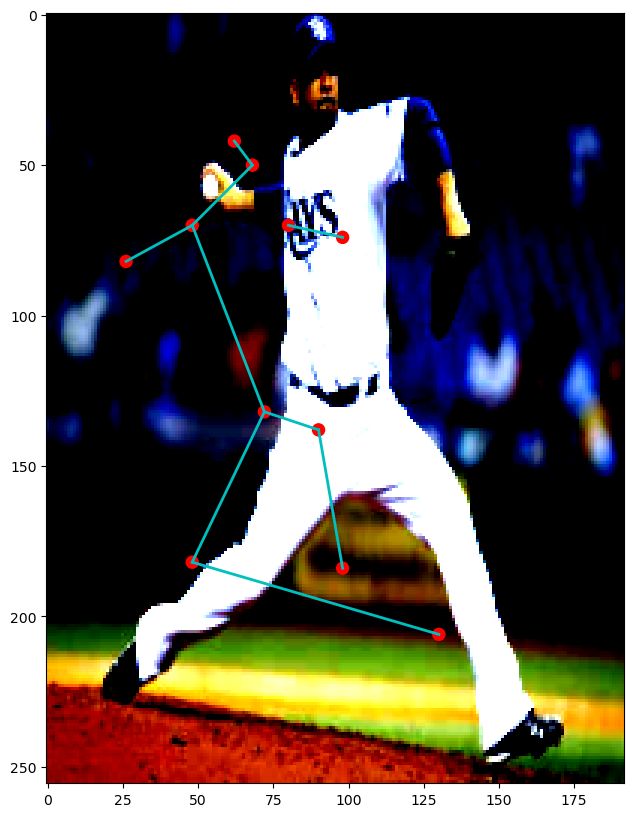

In [6]:
visibilities = torch.zeros((generated_heatmaps.shape[0], 17, 1))
for visibility, heatmaps in zip(visibilities, generated_heatmaps):
    for i, (heatmap, v) in enumerate(zip(heatmaps, visibility)):
        if heatmap.max() > 0.5:
            visibility[i] = 2
for heatmaps, visibility in zip(generated_heatmaps, visibilities):
    keypoints_from_heatmap = heatmaps2keypoints(heatmaps, val_image.shape, visibility)
    show_image(val_image, keypoints_from_heatmap)

In [7]:
train_image, _, visiblity = dataset_train[sampla_index_train]

In [8]:
with torch.no_grad():
    generated_heatmaps = diffusion_model.sample(
        n_sample=4, size=(17, 128, 96), c=train_image, device=device)
    generated_heatmaps = generated_heatmaps.cpu()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


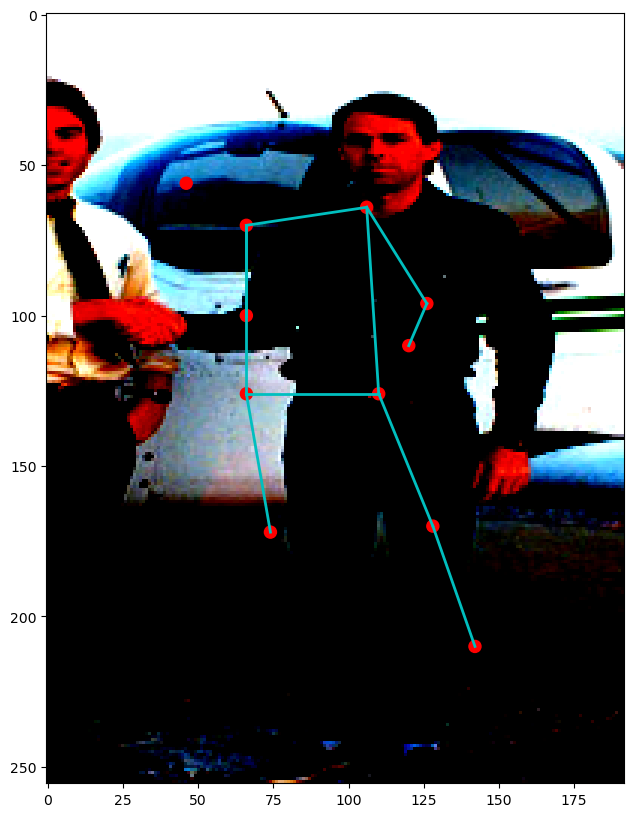

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


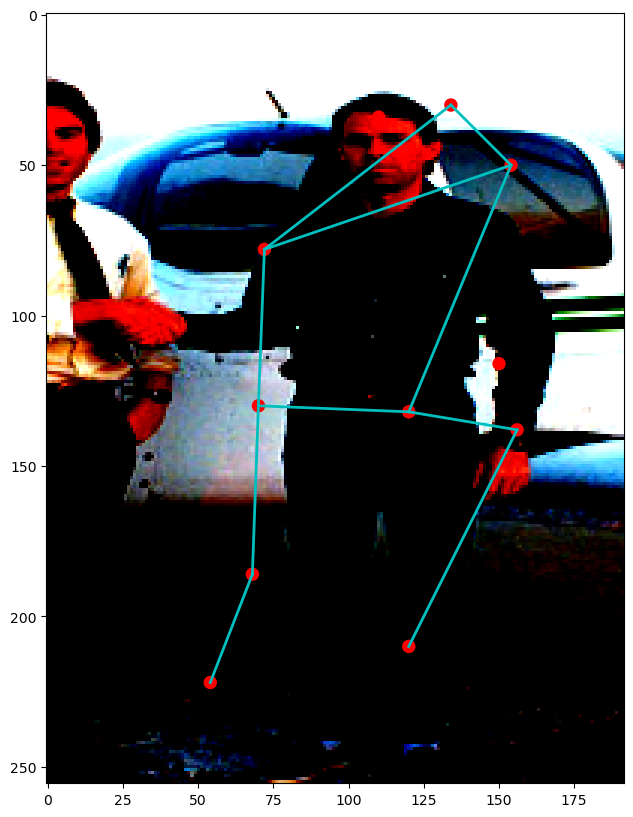

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


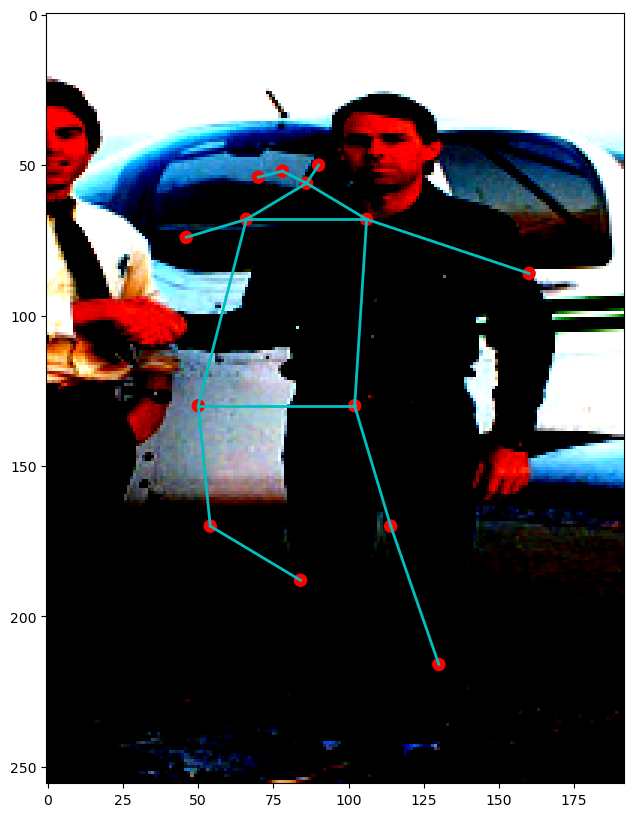

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


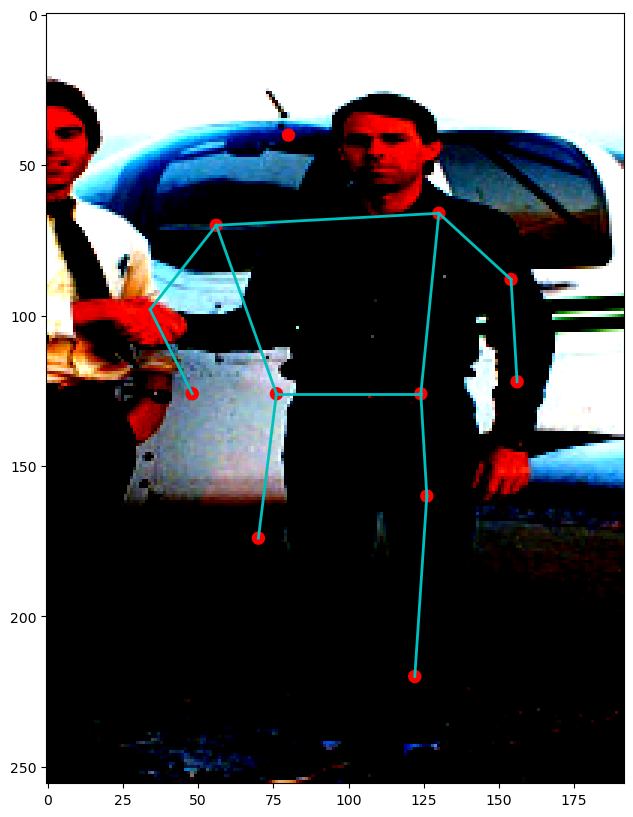

In [9]:
visibilities = torch.zeros((generated_heatmaps.shape[0], 17, 1))
for visibility, heatmaps in zip(visibilities, generated_heatmaps):
    for i, (heatmap, v) in enumerate(zip(heatmaps, visibility)):
        if heatmap.max() > 0.5:
            visibility[i] = 2
for heatmaps, visibility in zip(generated_heatmaps, visibilities):
    keypoints_from_heatmap = heatmaps2keypoints(heatmaps, train_image.shape, visibility)
    show_image(train_image, keypoints_from_heatmap)

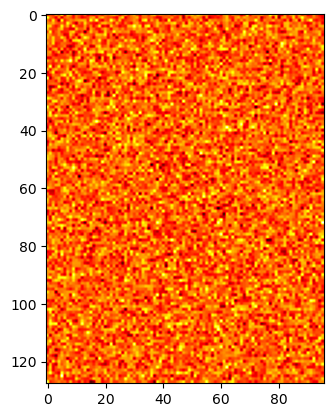

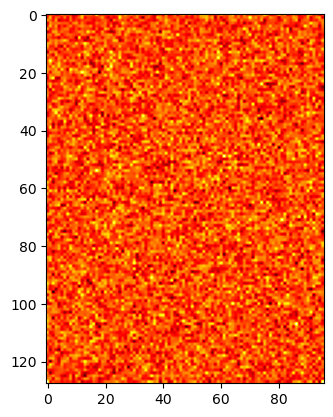

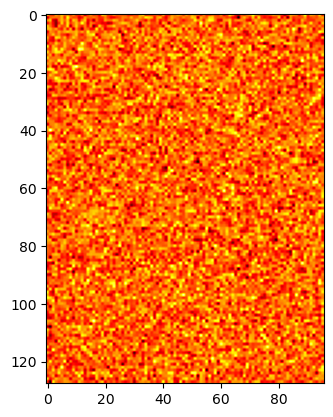

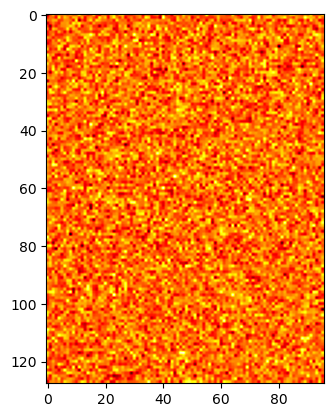

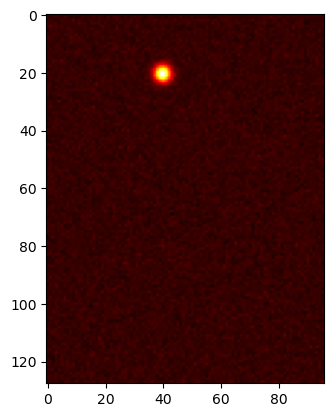

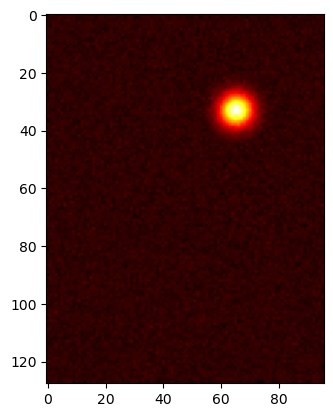

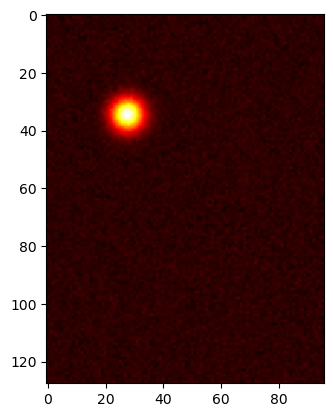

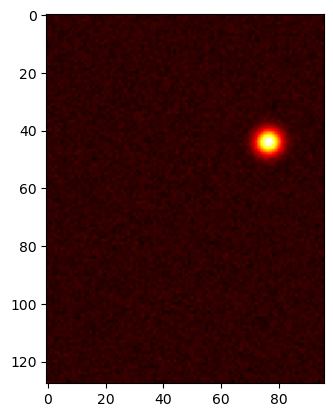

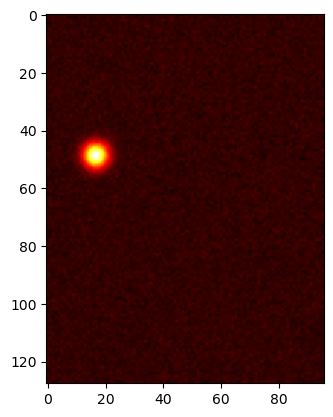

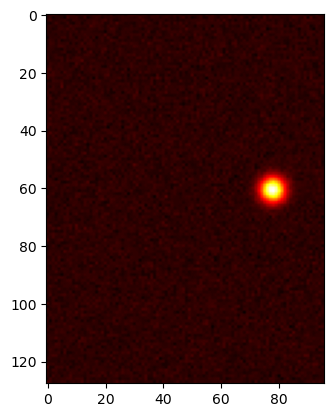

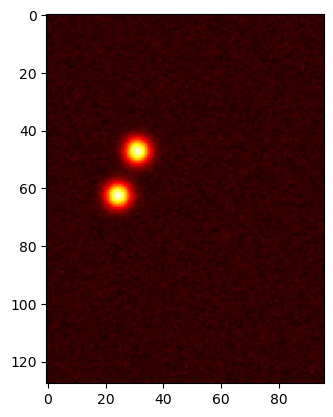

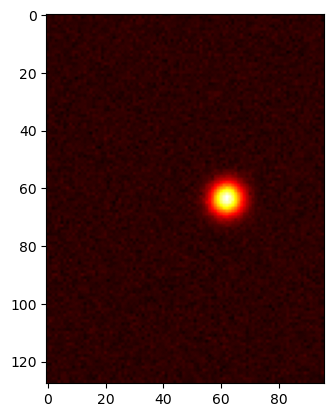

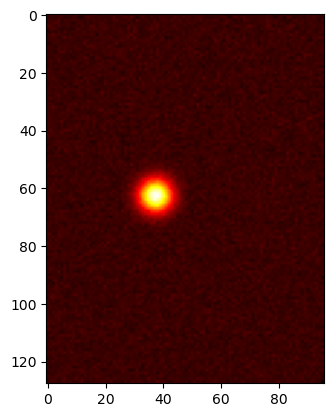

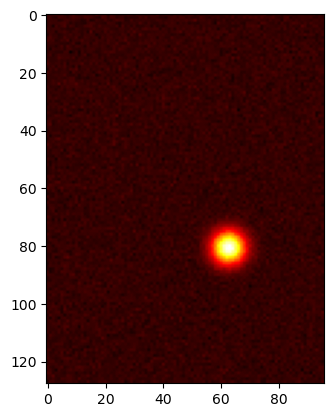

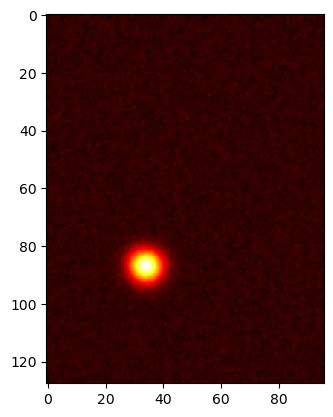

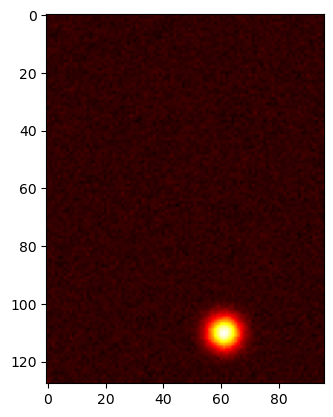

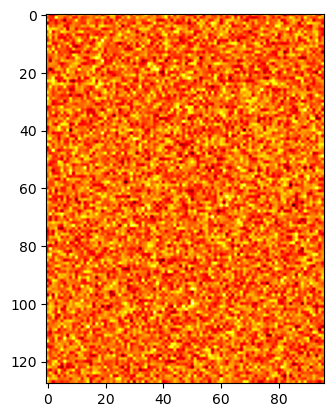

In [10]:
for heatmap in generated_heatmaps[3]:
    plt.imshow(heatmap, cmap="hot")
    plt.show()